#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3),activation='relu', 
                 padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [10]:
#卷積層2與池化層2

In [11]:
model.add(Conv2D(filters=64,kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [13]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(10, activation='softmax'))

In [14]:
#檢查model 的STACK
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [15]:
model.save('test_1004_model1.h5')

# 載入之前訓練的模型

In [16]:
try:
    model.load_weights("test_1004_model1.h5")
    print("載入模型成功!繼續訓練模型")
    print(model.summary())
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型成功!繼續訓練模型
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096) 

# 訓練模型

In [17]:
'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [19]:
model_copy2=model
model_copy2.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
model_copy2__train_history=model_copy2.fit(x_img_train_normalize,y_label_train_OneHot,
                                         validation_split = 0.2,
                                         epochs=8,batch_size = 16 , verbose = 1)

Epoch 1/8
2500/2500 [==============================] - 52s 21ms/step - loss: 0.0898 - accuracy: 0.1254 - val_loss: 0.0893 - val_accuracy: 0.1822
Epoch 2/8
2500/2500 [==============================] - 52s 21ms/step - loss: 0.0886 - accuracy: 0.1696 - val_loss: 0.0882 - val_accuracy: 0.2285
Epoch 3/8
2500/2500 [==============================] - 52s 21ms/step - loss: 0.0867 - accuracy: 0.2162 - val_loss: 0.0864 - val_accuracy: 0.2579
Epoch 4/8
2500/2500 [==============================] - 52s 21ms/step - loss: 0.0848 - accuracy: 0.2485 - val_loss: 0.0849 - val_accuracy: 0.2966
Epoch 5/8
2500/2500 [==============================] - 52s 21ms/step - loss: 0.0832 - accuracy: 0.2745 - val_loss: 0.0836 - val_accuracy: 0.31920s - los
Epoch 6/8
2500/2500 [==============================] - 52s 21ms/step - loss: 0.0820 - accuracy: 0.2976 - val_loss: 0.0825 - val_accuracy: 0.3292
Epoch 7/8
2500/2500 [==============================] - 52s 21ms/step - loss: 0.0808 - accuracy: 0.3155 - val_loss: 0.0815 

In [20]:
model_copy3=model
model_copy3.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_copy3__train_history=model_copy3.fit(x_img_train_normalize,y_label_train_OneHot,
                                         validation_split = 0.25,
                                         epochs=8,batch_size = 16 , verbose = 1)

Epoch 1/8
2344/2344 [==============================] - 51s 22ms/step - loss: 0.2714 - accuracy: 0.3544 - val_loss: 0.2725 - val_accuracy: 0.3986
Epoch 2/8
2344/2344 [==============================] - 51s 22ms/step - loss: 0.2574 - accuracy: 0.3907 - val_loss: 0.2601 - val_accuracy: 0.4182
Epoch 3/8
2344/2344 [==============================] - 51s 22ms/step - loss: 0.2468 - accuracy: 0.4182 - val_loss: 0.2515 - val_accuracy: 0.4405
Epoch 4/8
2344/2344 [==============================] - 51s 22ms/step - loss: 0.2388 - accuracy: 0.4399 - val_loss: 0.2440 - val_accuracy: 0.4669
Epoch 5/8
2344/2344 [==============================] - 51s 22ms/step - loss: 0.2317 - accuracy: 0.4544 - val_loss: 0.2367 - val_accuracy: 0.4848
Epoch 6/8
2344/2344 [==============================] - 51s 22ms/step - loss: 0.2261 - accuracy: 0.4746 - val_loss: 0.2343 - val_accuracy: 0.4818
Epoch 7/8
2344/2344 [==============================] - 51s 22ms/step - loss: 0.2212 - accuracy: 0.4842 - val_loss: 0.2254 - val_ac

In [39]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.ylim(0,1)
    plt.title('TrainHistory')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train','test'],loc='best')
    plt.show()

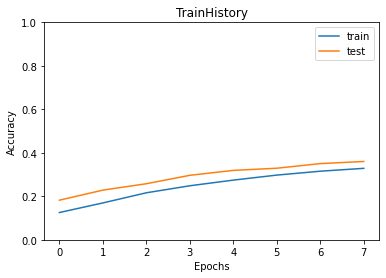

In [40]:
show_train_history(model_copy2__train_history,'accuracy','val_accuracy')

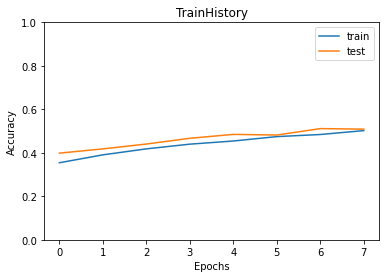

In [41]:
show_train_history(model_copy3__train_history,'accuracy','val_accuracy')